# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>

</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> Ce projet consiste en l'analyse d'un ensemble de données constitué de diverses informations sur des films. Les colonnes sont:
+ *id*: l'id du film dans l'ensemble de données
+ *imdb_id*: l'id du film au niveau de l'ensemble de données IMDB
+ *popularity*: un nombre indiquant la popularité du film
+ *budget*: le budget alloué pour la réalisation du film
+ *revenue*: le revenu obtenu de la réalisation du film
+ *original_title:* le title du film
+ *cast*: les acteurs/actrices du film, un string séparé par des pipes
+ *homepage*: le lien vers le film
+ *director*: le directeur
+ *tagline*: la phrase d'accroche du film
+ *keywords*: les mot clés du film, un string séparé par des pipes     
+ *overview*: une brève description du film              
+ *runtime*: la durée du film                
+ *genres*: les genres du film, un string séparé par des pipes         
+ *production_companies*: les maisons de production du film, , un string séparé par des pipes 
+ *release_date*: la date de sortie du film            
+ *vote_count*: le nombre de vote du public           
+ *vote_average*: la moyenne obtenue par le film          
+ *release_year*: l'année de sortie du film           
+ *budget_adj*: le budget en terme du dollars en  2010 en tenant compte de l'inflation
+ revenue_adj*: le revenu en terme du dollars en  2010 en tenant compte de l'inflation

> Il est disponible ici https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


### Question(s) for Analysis
Au cours de notre analyse nous allons essayer d'apporter des réponses aux questions qui suivent:
> <a href="#benefice">Quels sont les films qui ont rapporté le plus de bénéfices?</a>

> <a href="#populaire">Quels sont les films les plus populaires?</a>

> <a href="#apprecie">Quels sont les films les plus appréciés par le public?</a>

> <a href="#acteur">Quels sont les acteurs les plus sollicités?</a>

> <a href="#genre">Quels sont les genres de film les plus populaires?</a>

> <a href="#popularite_budget">Est ce qu'il y une relation entre la popularité d'un film et son budget?</a>

> <a href="#popularite_genre">Est ce qu'il y une relation entre la popularité d'un film et son genre?</a>

> <a href="#popularite_acteur">Est ce que la présence d'un acteur agit sur la popularité d'un film?</a>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'


%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


On constate que la colonne cast contient plusieurs valeurs séparées par des pipes (|). Il en est de même pour les colonnes genres, keywords et production_companies.

In [4]:
#checking columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

En analysant les types des colonnes, on constate que la colonne release_date devrait être de type datetime et que la colonne release_year n'a pas lieu d'être

Aussi nous n'avons pas besoin des colonnes homepage, tagline, overview, budget_adj et revenue_adj pour notre analyse

In [5]:
#verification de lignes dupliquées
df.duplicated().sum()

1

Nous avons une ligne dupliquées dans notre ensemble de données.

In [6]:
#vérification de valeurs nulles
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

En dehors des colonnes que nous comptons effacer nous avons quelques colonnes ayant des valeurs nulles.


### Data Cleaning
> En analysant l'ensemble de données nous avons remarqué plusieurs problème que sont:, 
+ la colonne release_date devrait être de type date
+ nous n'avons pas besoin des colonnes release_year, tagline, overview, homepage, budget_adj et revenue_adj
+ il y a des valeurs nulles
+ il y a des lignes dupliquées
+ nous pouvons ajouter la colonne bénéfice afin de faire les études sur les bénéfices rapportés par les films

In [7]:
# conversion du type de la colonne release_date
df.release_date = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [8]:
# suppression des colonnes
df.drop(['release_year','tagline', 'overview','homepage','budget_adj','revenue_adj'], axis=1, inplace=True)

In [9]:
#Gestion des valeurs nulles
#visualisation après suppression des colonnes
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
dtype: int64

In [10]:
#suppresion de la colonne imdb_id vu que l'id suffit amplement
df.drop(['imdb_id'], axis=1, inplace=True)

In [11]:
#remplissage des autres valeurs nulles par des 0
df.fillna(0, inplace=True)

In [12]:
#vérification du remplissage
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
dtype: int64

In [13]:
#ajout de la colonne bénéfice

df['benefice']=df.revenue-df.budget
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,benefice
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,1316249360


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,benefice
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2.519762e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,9.658799e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,9.083358e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2.544506e+09


<a id='benefice'></a>

### Quels sont les films qui ont rapporté le plus de bénéfices?

In [15]:
#utilisation du 75th percentile
benefice_75th = df.benefice.quantile(0.75)

#récupération des films ayant des bénéfices superieure à cette valeur 
best_benefice_movies=df.query(f'benefice >= {benefice_75th}').sort_values(by='benefice', ascending=False)

In [16]:
best_benefice_movies.loc[:,['original_title','benefice']]

,original_title,benefice
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


Ainsi nous avons 2717 films qui ont rapporté le plus de bénéfice. Ces films ont été classé par ordre de bénéfice le plus élévé. Le film ayant rapporté le plus est **Avatar**.

<a id='populaire'></a>

### Quels sont les films les plus populaires?

In [17]:
#utilisation du 75th percentile
popularity_75th = df.popularity.quantile(0.75)

#récupération des films ayant des bénéfices superieure à cette valeur 
popular_movies=df.query(f'popularity >= {popularity_75th}').sort_values(by='popularity', ascending=False)
popular_movies.loc[:,['original_title','popularity']]

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


Il y a ainsi 2717 films populaires. Le plus populaire est Jurassic World.

<a id='apprecie'></a>

### Quels sont les films les plus appréciés par le public?

In [18]:
#Récupération des films ayant reçu assez de nombre de vote pour ne pas fausser les votes
movies = df.query(f'vote_count >= {df.vote_count.mean()}')

#utilisation du 75th percentile
vote_average_75th = df.vote_average.quantile(0.75)

#récupération des films ayant des bénéfices superieure à cette valeur  et classement par nombre de vote et moyenne obtenue
liked_movies=movies.query(f'vote_average >= {vote_average_75th}').sort_values(by=['vote_count','vote_average'], ascending=False)
liked_movies.loc[:,['original_title','vote_average','vote_count']]


,original_title,vote_average,vote_count
1919,Inception,7.9,9767
4361,The Avengers,7.3,8903
1386,Avatar,7.1,8458
2875,The Dark Knight,8.1,8432
4364,Django Unchained,7.7,7375
4382,The Hunger Games,6.7,7080
5425,Iron Man 3,6.9,6882
4363,The Dark Knight Rises,7.5,6723
629,Interstellar,8.0,6498
4367,The Hobbit: An Unexpected Journey,6.9,6417


Ainsi nous avons 907 films plus appreciés par le public. Les cinq les plus appreciés sont **Inception, The Avengers, Avatar, The Dark Knight et Django Unchained**. 

<a id='acteur'></a>

### Quels sont les acteurs les plus solicités?

In [19]:
#Trie de la colonne cast afin d'avoir la liste de tous les acteurs
df['cast']=df['cast'].astype(str)
actors = df['cast'].str.cat(sep = '|')
actors = pd.Series(actors.split('|'))
actors

0                     Chris Pratt
1             Bryce Dallas Howard
2                     Irrfan Khan
3               Vincent D'Onofrio
4                   Nick Robinson
5                       Tom Hardy
6                 Charlize Theron
7                Hugh Keays-Byrne
8                  Nicholas Hoult
9                     Josh Helman
10               Shailene Woodley
11                     Theo James
12                   Kate Winslet
13                   Ansel Elgort
14                   Miles Teller
15                  Harrison Ford
16                    Mark Hamill
17                  Carrie Fisher
18                    Adam Driver
19                   Daisy Ridley
20                     Vin Diesel
21                    Paul Walker
22                  Jason Statham
23             Michelle Rodriguez
24                 Dwayne Johnson
25              Leonardo DiCaprio
26                      Tom Hardy
27                   Will Poulter
28               Domhnall Gleeson
29            

In [20]:
#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
data={"nom":actors.value_counts().index, "count":actors.value_counts().values}
actors = pd.DataFrame(data)
actors


,nom,count
0,0,76
1,Robert De Niro,72
2,Samuel L. Jackson,71
3,Bruce Willis,62
4,Nicolas Cage,61
5,Michael Caine,53
6,Robin Williams,51
7,John Cusack,50
8,Morgan Freeman,49
9,John Goodman,49


In [21]:
actors.describe()

,count
count,19027.000000
mean,2.767068
std,4.775435
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,76.000000


In [22]:
#la moyenne etant trop petite par rapport à la valeur maximale, fixons un nbre de fois où l'on considerera qu'un acteur est très sollicité

known_actors = actors.query('count >= 30').sort_values(by='count', ascending=False)
known_actors

,nom,count
0,0,76
1,Robert De Niro,72
2,Samuel L. Jackson,71
3,Bruce Willis,62
4,Nicolas Cage,61
5,Michael Caine,53
6,Robin Williams,51
7,John Cusack,50
9,John Goodman,49
8,Morgan Freeman,49


In [23]:
#supprimons la ligne des valeurs nulles representées par 0
known_actors.drop([0], inplace=True)
known_actors

,nom,count
1,Robert De Niro,72
2,Samuel L. Jackson,71
3,Bruce Willis,62
4,Nicolas Cage,61
5,Michael Caine,53
6,Robin Williams,51
7,John Cusack,50
9,John Goodman,49
8,Morgan Freeman,49
11,Liam Neeson,48


Nous disposons de **19027** acteurs dont **141** sont plus sollicités. Les plus sollicités d'entre eux sont: **Robert De Niro**, **Samuel L. Jackson**, **Bruce Willis**, **Nicolas Cage** et **Michael Caine**.

<a id='genre'></a>

### Quels sont les genres de film les plus populaires?

In [24]:
#Trie de la colonne genre afin d'avoir la liste de tous les genres
df['genres']=df['genres'].astype(str)
genres = df['genres'].str.cat(sep = '|')
genres = pd.Series(genres.split('|'))
genres

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
5              Adventure
6        Science Fiction
7               Thriller
8              Adventure
9        Science Fiction
10              Thriller
11                Action
12             Adventure
13       Science Fiction
14               Fantasy
15                Action
16                 Crime
17              Thriller
18               Western
19                 Drama
20             Adventure
21              Thriller
22       Science Fiction
23                Action
24              Thriller
25             Adventure
26                 Drama
27             Adventure
28       Science Fiction
29                Family
              ...       
26953              Drama
26954            Romance
26955           Thriller
26956              Drama
26957              Crime
26958             Comedy
26959             Family
26960            Mystery
26961            Romance


In [25]:
#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
data={"nom":genres.value_counts().index, "count":genres.value_counts().values}
genres = pd.DataFrame(data)
genres


,nom,count
0,Drama,4761
1,Comedy,3793
2,Thriller,2908
3,Action,2385
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1355
8,Family,1231
9,Science Fiction,1230


In [26]:
genres.describe()

,count
count,21.000000
mean,1284.904762
std,1262.200020
min,23.000000
25%,334.000000
50%,916.000000
75%,1637.000000
max,4761.000000


In [27]:
#récupération de la moyenne de l'occurrence d'un genre
mean= genres.mean()['count'
                   ]
#genres ayant une occurence supérieure à cette moyenne
known_genres = genres.query(f'count >= {mean}').sort_values(by='count', ascending=False)
known_genres


,nom,count
0,Drama,4761
1,Comedy,3793
2,Thriller,2908
3,Action,2385
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1355


Vu que nous disposons d'un petit nombre de genres populaires, visualisons les à l'aide des bar chat.

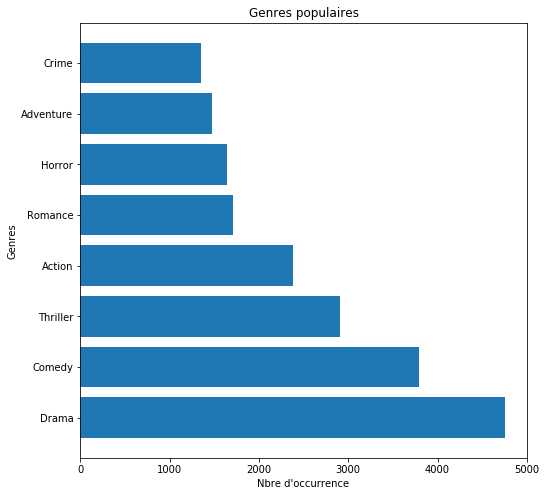

In [28]:
plt.figure(figsize=(8,8))
plt.barh([1,2,3,4,5,6,7,8],known_genres['count'],tick_label=known_genres.nom)
plt.title("Genres populaires")
plt.xlabel("Nbre d'occurrence")
plt.ylabel("Genres")
plt.show()

Nous disposons de **21** genres dont 8 sont plus populaires. Les plus populaires d'entre eux sont: **Drama**,**Comedy**,**Thriller**, **Action**, **Romance**, **Horror**, **Adventure** et **Crime**.

<a id='popularite_budget'></a>
### Est ce qu'il y une relation entre la popularité d'un film et son budget?

In [29]:
# regroupement des films selon le niveau popularité
quantiles =  df.popularity.quantile([0.25,0.5,0.75]).tolist()
bins=[df.popularity.min(),quantiles[0],quantiles[1],quantiles[2],df.popularity.max()]
labels=["non_populaire","peu_populaire","moyen_populaire","populaire"]
df['popularity_level']=pd.cut(df.popularity,bins,labels=labels)

In [30]:
#budget moyen par niveau
mean_budget_by_popularity_level=df.groupby('popularity_level').budget.mean()
mean_budget_by_popularity_level


popularity_level
non_populaire      2.058983e+06
peu_populaire      4.794100e+06
moyen_populaire    1.070702e+07
populaire          4.093840e+07
Name: budget, dtype: float64

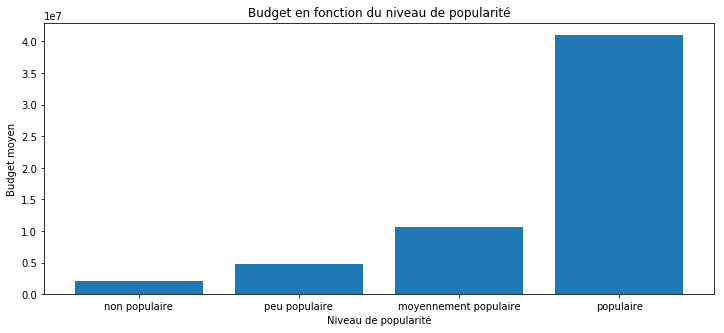

In [31]:
#size
plt.figure(figsize=(12,5))

#labels
labels=['non populaire', 'peu populaire', 'moyennement populaire', 'populaire']

#drawing bars
plt.bar([1,2,3,4],mean_budget_by_popularity_level,tick_label=labels)

#titles
plt.title("Budget en fonction du niveau de popularité")
plt.xlabel("Niveau de popularité")
plt.ylabel("Budget moyen")
plt.show()

Le graphique ci dessous nous permet de visualiser le budget moyen attribué à un film en fonction de son niveau de popularité. On constate qu'il y a une enorme différence entre les budgets. Cherchons la source d'une telle différence.

In [32]:
df.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

On constate que les quantiles 1 et 2 du budget sont égales à 0.
Voyons le nombre de films qui a 0 comme budget.

In [33]:
df.query("budget== 0").count()

id                      5696
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5696
director                5696
keywords                5696
runtime                 5696
genres                  5696
production_companies    5696
release_date            5696
vote_count              5696
vote_average            5696
benefice                5696
popularity_level        5695
dtype: int64

En cherchant l'origine d'une telle différence on constate qu'à peu près la moitié de l'ensemble de données a 0 comme budget, ce qui n'est pas vrai. Donc il y a des données manquantes au niveau du budget. Ce qui pourrait fausser la dépendance trouvée. Visualisons le nuage de points des deux données.

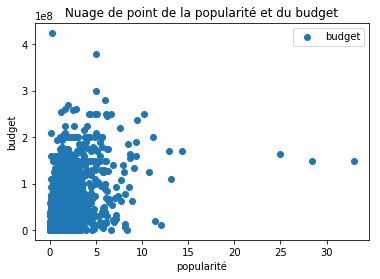

In [34]:
plt.scatter(x=df.popularity, y=df.budget)

#titles et légendes
plt.title("Nuage de point de la popularité et du budget")
plt.xlabel("popularité")
plt.ylabel("budget")
plt.legend()
plt.show()

Le graphique ci dessus nous permet de détecter le type de relation qui existe entre la popularité d'un film et son budget. Comme on le voit, il n'y a aucune relation entre ces deux valeurs.

En se basant sur les résultats obtenus, qu'il n'y a aucune relation entre le budget et la popularité d'un film. A cause des données manquantes on ne pourrait rien faire de plus.

<a id='popularite_genre'></a>

### Est ce qu'il y une relation entre la popularité d'un film et son genre?

In [35]:
#function permettant de recupérer une série contenant tous les éléments 
# séparés pars des pipes (|) au niveau d'une colonne

def get_series_data(frame, index):
    frame.loc[index]=frame[index].astype(str)
    to_return = frame[index].str.cat(sep = '|')
    to_return = pd.Series(to_return.split('|'))
    return to_return

In [36]:
populaire = df.query("popularity_level == 'populaire'")
populaire_genres=get_series_data(populaire,'genres')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
custom_index=populaire_genres.value_counts().index

data={"nom":custom_index, "count":populaire_genres.value_counts().values}
populaire_genres = pd.DataFrame(data)
populaire_genres

,nom,count
0,Drama,1087
1,Comedy,948
2,Thriller,850
3,Action,823
4,Adventure,615
5,Crime,447
6,Romance,430
7,Science Fiction,409
8,Family,404
9,Fantasy,358


In [37]:
moyen_populaire = df.query("popularity_level == 'moyen_populaire'")
moyen_populaire_genres=get_series_data(moyen_populaire,'genres')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait 
# avec l'index sauvegardé plus haut
data={"nom":custom_index, "count":moyen_populaire_genres.value_counts()[custom_index].values}
moyen_populaire_genres = pd.DataFrame(data)
moyen_populaire_genres


,nom,count
0,Drama,1321
1,Comedy,978
2,Thriller,818
3,Action,595
4,Adventure,340
5,Crime,382
6,Romance,470
7,Science Fiction,276
8,Family,319
9,Fantasy,223


In [38]:
peu_populaire = df.query("popularity_level == 'peu_populaire'")
peu_populaire_genres=get_series_data(peu_populaire,'genres')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
data={"nom":custom_index, "count":peu_populaire_genres.value_counts()[custom_index].values}
peu_populaire_genres = pd.DataFrame(data)
peu_populaire_genres

,nom,count
0,Drama,1288
1,Comedy,939
2,Thriller,718
3,Action,564
4,Adventure,291
5,Crime,311
6,Romance,425
7,Science Fiction,276
8,Family,275
9,Fantasy,178


In [39]:
non_populaire = df.query("popularity_level == 'non_populaire'")
non_populaire_genres=get_series_data(non_populaire,'genres')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
data={"nom":custom_index, "count":non_populaire_genres.value_counts()[custom_index].values}
non_populaire_genres = pd.DataFrame(data)
non_populaire_genres

,nom,count
0,Drama,1064
1,Comedy,928
2,Thriller,522
3,Action,403
4,Adventure,225
5,Crime,215
6,Romance,387
7,Science Fiction,269
8,Family,233
9,Fantasy,157


In [40]:
#Liste des datasets
frames = [populaire_genres, moyen_populaire_genres, peu_populaire_genres,non_populaire_genres]

#merging des datasets
result =  pd.concat(frames, axis=1, ignore_index=True, join="inner")
result

,0,1,2,3,4,5,6,7
0,Drama,1087,Drama,1321,Drama,1288,Drama,1064
1,Comedy,948,Comedy,978,Comedy,939,Comedy,928
2,Thriller,850,Thriller,818,Thriller,718,Thriller,522
3,Action,823,Action,595,Action,564,Action,403
4,Adventure,615,Adventure,340,Adventure,291,Adventure,225
5,Crime,447,Crime,382,Crime,311,Crime,215
6,Romance,430,Romance,470,Romance,425,Romance,387
7,Science Fiction,409,Science Fiction,276,Science Fiction,276,Science Fiction,269
8,Family,404,Family,319,Family,275,Family,233
9,Fantasy,358,Fantasy,223,Fantasy,178,Fantasy,157


Visualisons les occurences des genres au niveau de chaque catégorie de popularité des films afin d'y détecter une certaine dépendance. Vu que nous avons 20 genres ce qui est beaucoup et 4 niveaux de popularité, traçons le graphe de l'occurence des genres en fonction du niveau de popularité des films. 

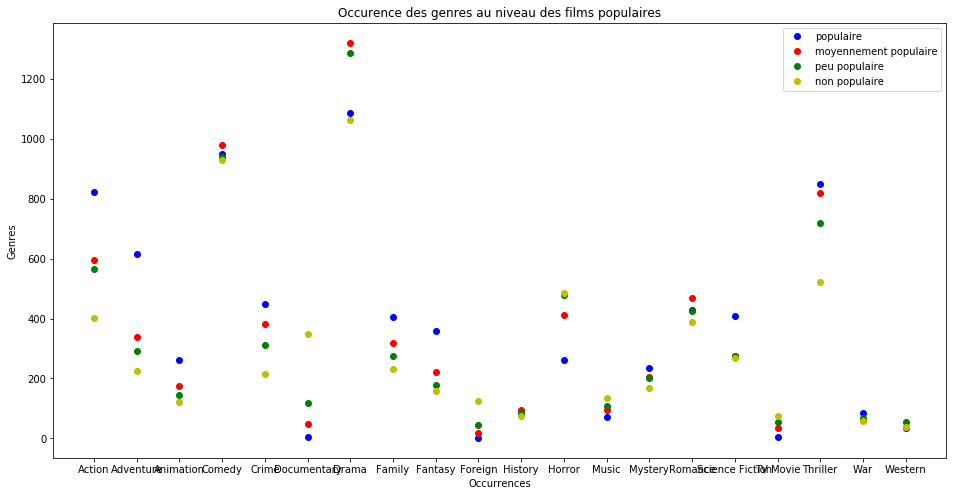

In [41]:
#taille de la figure
plt.figure(figsize=(16,8))

#Tracés et leurs labels
plt.plot(populaire_genres['nom'],populaire_genres['count'],'bo', label="populaire")
plt.plot(moyen_populaire_genres['nom'],moyen_populaire_genres['count'],'ro', label="moyennement populaire")
plt.plot(peu_populaire_genres['nom'],peu_populaire_genres['count'],'go', label="peu populaire")
plt.plot(non_populaire_genres['nom'],non_populaire_genres['count'],'yo', label="non populaire")

#titles et légendes
plt.title("Occurence des genres au niveau des films populaires")
plt.xlabel("Occurrences")
plt.ylabel("Genres")
plt.legend()
plt.show()

Nous constatons qu'il n'y a aucune relation entre le genre et la popularité d'un film.

<a id='popularite_acteur'></a>
### Est ce que la présence d'un acteur agit sur la popularité d'un film?

In [42]:
#Liste des acteurs appartenant au niveau
populaire_actors=get_series_data(populaire,'cast')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
custom_index = populaire_actors.value_counts().index
data={"nom":custom_index, "count":populaire_actors.value_counts().values}
populaire_actors = pd.DataFrame(data)
populaire_actors

,nom,count
0,Robert De Niro,42
1,Bruce Willis,35
2,Samuel L. Jackson,34
3,Nicolas Cage,33
4,Brad Pitt,32
5,Johnny Depp,32
6,Tom Cruise,29
7,Matt Damon,29
8,Arnold Schwarzenegger,28
9,Tom Hanks,27


In [43]:
#Liste des acteurs appartenant au niveau
moyen_populaire_actors=get_series_data(moyen_populaire,'cast')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
custom_index = moyen_populaire_actors.value_counts().index
data={"nom":custom_index, "count":moyen_populaire_actors.value_counts()[custom_index].values}
moyen_populaire_actors = pd.DataFrame(data)
moyen_populaire_actors

,nom,count
0,Samuel L. Jackson,26
1,Jean-Claude Van Damme,23
2,Susan Sarandon,21
3,Clint Eastwood,20
4,Dennis Quaid,19
5,Antonio Banderas,19
6,Robert De Niro,19
7,Nicolas Cage,18
8,Bruce Willis,18
9,Robert Duvall,18


In [44]:
#Liste des acteurs appartenant au niveau
peu_populaire_actors=get_series_data(peu_populaire,'cast')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
custom_index = peu_populaire_actors.value_counts().index

data={"nom":custom_index, "count":peu_populaire_actors.value_counts()[custom_index].values}
peu_populaire_actors = pd.DataFrame(data)
peu_populaire_actors

,nom,count
0,Steven Seagal,20
1,Ray Liotta,16
2,Donald Sutherland,15
3,Stephen Dorff,14
4,Harvey Keitel,14
5,Christian Slater,14
6,Jeff Bridges,13
7,John Cusack,13
8,Ron Perlman,13
9,Michael Caine,13


In [45]:
#Liste des acteurs appartenant au niveau
non_populaire_actors=get_series_data(non_populaire,'cast')

#creation du dataframe contenant chaque acteur et le nombre de fois qu'il apparait
custom_index = non_populaire_actors.value_counts().index

data={"nom":custom_index, "count":non_populaire_actors.value_counts()[custom_index].values}
non_populaire_actors = pd.DataFrame(data)
non_populaire_actors.drop(0, inplace=True)
non_populaire_actors

,nom,count
1,Vincent Price,12
2,Peter Cushing,12
3,Danny Glover,10
4,GÃ©rard Depardieu,10
5,Gene Hackman,9
6,Harvey Keitel,9
7,Tim Roth,8
8,Christian Slater,8
9,Rani Mukerji,8
10,Catherine Keener,8


Comparons l'occurence des acteurs  au niveau de chaque niveau de popularité de films.

In [46]:
#liste des dataframes
frames = [populaire_actors, moyen_populaire_actors, peu_populaire_actors, non_populaire_actors]

#merging des datasets
result =  pd.concat(frames, axis=1, ignore_index=True, join="inner")
result

,0,1,2,3,4,5,6,7
1,Bruce Willis,35,Jean-Claude Van Damme,23,Ray Liotta,16,Vincent Price,12
2,Samuel L. Jackson,34,Susan Sarandon,21,Donald Sutherland,15,Peter Cushing,12
3,Nicolas Cage,33,Clint Eastwood,20,Stephen Dorff,14,Danny Glover,10
4,Brad Pitt,32,Dennis Quaid,19,Harvey Keitel,14,GÃ©rard Depardieu,10
5,Johnny Depp,32,Antonio Banderas,19,Christian Slater,14,Gene Hackman,9
6,Tom Cruise,29,Robert De Niro,19,Jeff Bridges,13,Harvey Keitel,9
7,Matt Damon,29,Nicolas Cage,18,John Cusack,13,Tim Roth,8
8,Arnold Schwarzenegger,28,Bruce Willis,18,Ron Perlman,13,Christian Slater,8
9,Tom Hanks,27,Robert Duvall,18,Michael Caine,13,Rani Mukerji,8
10,Sylvester Stallone,27,Michael Caine,18,Christopher Walken,12,Catherine Keener,8


De cette comparaison, nous constatons que ce ne sont pas les mêmes acteurs qui sont fréquents dans les différentes catégories de films. Mais nous ne pouvons pas nous baser sur juste cela pour déduire qu'il y a une relation entre la présence d'un acteur et la popularité d'un film.

<a id='conclusions'></a>
## Conclusions

> Au cours de notre analyse, nous avons essayer de repondre à plusieurs questions. Il en découle qu'il y a 2717 films ayant rapporté le plus de bénéfices dont *Avatar,Star Wars: The Force Awakens, Titanic, Jurassic World et Fast & Furious7*.Les plus populaires sont au nombre de 2717 dont *Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy et Insurgent* Ceux qui ont été les plus appréciés par le public sont au nombre de 907 dont *Inception, The Avengers, Avatar, The Dark Knight et Django Unchained*. . Les acteurs qui ont été les plus sollicités dans les films sont au nombre de 141 *Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage et Michael Caine*. Avec un total de 20 genres connus, 8 ont une grandre fréquence d'apparition. Il s'agit des genres *Drama,Comedy,Thriller, Action, Romance, Horror, Adventure et Crime*.


> Il est à noter que afin d'avoir des réponses aux questions, nous avons fixé des seuils à partir desquels on considère que tel métric est plus populaire, apprecié... Ces valeurs étant relatives, nous ne pouvons généraliser ces résultats. C'est le cas par exemple des acteurs les plus solicités dont le seuil a été fixé à 30 au regard du nombre maximum de fois qu'un acteur ait été sollicité. 


> Pour ce qui est des dépendances de certaines données, nous avons constaté qu'avec les donées actuelles, il n'y a aucune relation entre le budget et la popularité des films. Nous ne pouvons approfondir les analyses à cause du manque des données au niveau des budgets des films. Cela met aussi en cause notre liste de films ayant rapporté le plus de bénéfices.

> Entre le genre d'un film et sa popularité nous n'avons trouvé aucune relation. Aussi nous avons constaté une grande frequence de certains acteurs au niveau de certaines catégories de films. Mais nous  ne pouvons pas nous baser sur juste cela pour déduire qu'il y a une relation entre la présence d'un acteur et la popularité d'un film.

> Lors de l'étude de cet ensemble de données nous avons été **limité** par le manque de valeur des budgets des films. Cela nous a empêché d'évaluer réellement la relation entre les budgets des films et leurs popularités et la liste des films ayant rapporté le plus de bénéfices.


<a id='references'></a>
## Références

> <a href='https://pandas.pydata.org/docs/'> Documentation de pandas </a>

> <a href=''> Documentation de numpy </a>

> <a href=''> Documentation de matplotlib </a>

> <a href='https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/'>Geeksforgeeks groupby</a>

> <a href='https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/'>Sparkbyexamples query</a>

> <a href='https://sparkbyexamples.com/pandas/pandas-merge-multiple-dataframes/'>Sparkbyexamples merge dataframe</a>

> <a href='#'>Stackoverflow</a>


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0